In [265]:
def sizeof_number(number):
    """
    format values per thousands : K-thousands, M-millions, B-billions. 
    
    parameters:
    -----------
    number is the number you want to format
    currency is the prefix that is displayed if provided (€, $, £...)
    
    """
    if number != 0:
        for unit in ['','K','M', 'B']:
            if abs(number) < 1000:
                return f"{number}{unit}"
            number /= 1000
        return f"{number:6.2f}"
    else:
        return ''

In [285]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter
# Load data and aggregate the volume for both sides
data = pd.read_csv(r'Z:\External Research\2023 Interns\BPIPE\res\3738 HK Trade Journal.csv')

data = data[(data['Action'] == 'Trade')] # Filter trade
group_broker = data.groupby(by=["Broker Name", 'Side'])['Size'].sum()
group_broker = group_broker.unstack(level=-1)
group_broker = group_broker.fillna(0).sort_values(by=group_broker.columns[-1], ascending=False)

[      0.  200000.  400000.  600000.  800000. 1000000. 1200000.]


C:\Users\joeyge\AppData\Local\Temp\ipykernel_20544\1003093881.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{}'.format(sizeof_number(x)) for x in current_values])


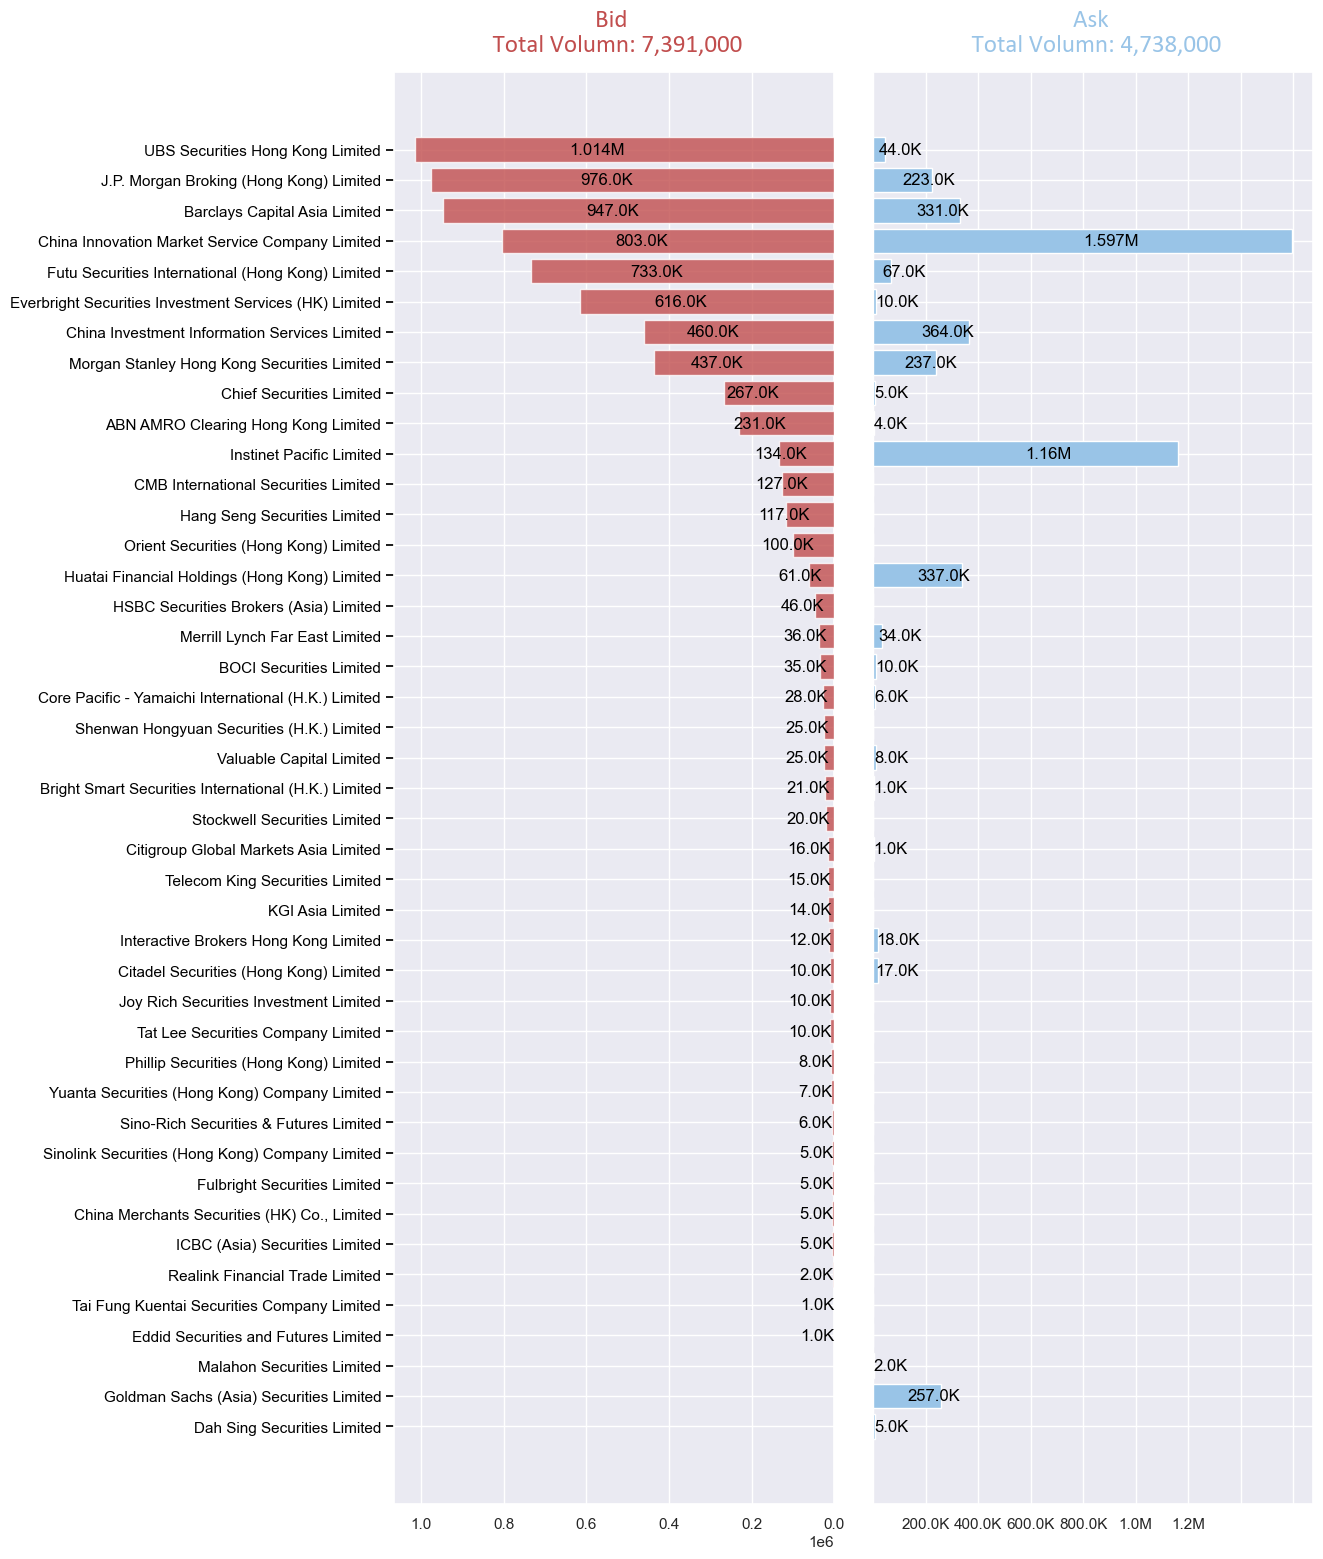

In [293]:
# Plotting
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = 'white'
color_red = '#c14e4e'
color_blue = '#99C4E7'
index = group_broker.index
if group_broker.shape[1] == 2:
    column0 = group_broker['ASK']
    column1 = group_broker['BID']
    title0 = 'Ask \n Total Volumn: {:,}'.format(int(group_broker.sum()[0]))
    title1 = 'Bid \n Total Volumn: {:,}'.format(int(group_broker.sum()[1]))
elif group_broker.shape[1] == 1 and group_broker.columns[0] == "ASK":
    column0 = group_broker['ASK']
    title0 = 'Ask \n Total Volumn: {:,}'.format(int(group_broker.sum()[0]))
elif group_broker.shape[1] == 1 and group_broker.columns[0] == "BID":
    column0 = group_broker['BID']
    title0 = 'Bid \n Total Volumn: {:,}'.format(int(group_broker.sum()[0]))

if group_broker.shape[1] == 2:
    fig, axes = plt.subplots(figsize=(10,15), facecolor=facecolor, ncols=2, sharey=True)
    fig.tight_layout() 
    bar0 = axes[0].barh(index, column1, align='center', color=color_red, alpha=0.8, zorder=10) #TODO: alpha=0.8
    axes[0].set_title(title1, fontsize=18, pad=15, color=color_red, **hfont)
    bar1 = axes[1].barh(index, column0, align='center', color=color_blue, zorder=10)
    axes[1].set_title(title0, fontsize=18, pad=15, color=color_blue, **hfont)

    current_values = axes[0].get_xticks()
    print(current_values)
    plt.gca().set_xticklabels(['{}'.format(sizeof_number(x)) for x in current_values])

    for i, v in enumerate(column1):
        axes[0].text(v/2, i, str(sizeof_number(v)), color='black', ha='right', va='center', zorder=11)
    for i, v in enumerate(column0):
        axes[1].text(v/2, i, str(sizeof_number(v)), color='black', ha='left', va='center', zorder=11)
    axes[0].invert_xaxis() 
    plt.gca().invert_yaxis()
    axes[0].set(yticks=group_broker.index, yticklabels=group_broker.index)
    axes[0].yaxis.tick_left()
    axes[0].tick_params(axis='y', colors='black') # tick color

if group_broker.shape[1] == 1:
    fig, axes = plt.subplots(figsize=(10,15), facecolor=facecolor, ncols=1)
    fig.tight_layout() 
    if group_broker.columns[0] == "ASK":
        bars = axes.barh(index, column0, align='center', color=color_red, zorder=10)
        axes.set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
    if group_broker.columns[0] == "BID":
        bars = axes.barh(index, column0, align='center', color=color_blue, zorder=10)
        axes.set_title(title0, fontsize=18, pad=15, color=color_blue, **hfont)
    for i, v in enumerate(column0):
        axes.text(v/2, i, str(sizeof_number(v)), color='black', ha='left', va='center', zorder=11)

    plt.gca().invert_yaxis()
    axes.set(yticks=group_broker.index, yticklabels=group_broker.index)
    axes.yaxis.tick_left()
